# DDPM Implementation

Author: George Witt

Project Span: 05/15/23 TO 05/19/23

DUE: 05/19/23 MIDNIGHT.

See supplemental paper and website for extra details and graphics.

In [8]:
import numpy as np
import torch

from Lib.data_loading import load_data, standardize
from Lib.viz_data import viz_mnist
from Lib.noise import calc_alpha_ts, calc_alpha_ts_bar, linear_var_schedule, gauss_noise_step

from Lib.models import DDPM

## MNIST Dataset

The DDPM (Denoising Diffusion Probabilistic Model) network is a diffusion-based network focused on learning the reverse transition of noise applied to a given training set. In other words, given a set X on which multiple steps of randomly sampled Gaussian noise is added, can we determine a consistent method to reverse the noise (ie noise step -> org. image) that minimizes the loss. This approach can be used for a variety of tasks, from generating images, to generating videos, to even solving NP problems like the Euler TSP (Traveling Salesman) problem.

To demonstrate DDPM implementation, we begin with its implementation on the MNIST dataset.

Please refer to the full write-up for technical details and a formal explanation of the topics in this notebook. This notebook only provides brief notes on certain sections of the code, while the full mathematical write-up and derivations are provided in the accompanying paper itself.

Let us begin by considering the steps of the DDPM network.

Training:

    1) Given a batch of some images, process them through a noise scheduler.
    2) Given a batch of noised images, denoise them with the model.
    3) Evaluate performance and optimize the network.  

In [9]:
# Load data
(mnist_x, mnist_y), (mnist_x_test, mnist_y_test), info = load_data('mnist')

print("MNIST X Shape: ", mnist_x.shape)
print("MNIST X Test Shape: ", mnist_x_test.shape)
print("MNIST Y Shape: ", mnist_y.shape)
print("MNIST Y Test Shape: ", mnist_y_test.shape)

MNIST X Shape:  (60000, 784)
MNIST X Test Shape:  (10000, 784)
MNIST Y Shape:  (60000,)
MNIST Y Test Shape:  (10000,)


In [10]:
# Data is organized in full arrays of 784 values. The original images are 28 x 28, let's preprocess all this by reverting
# BACK to the 28 x 28 image sets.

mnist_x = mnist_x.reshape(mnist_x.shape[0], 28, 28)
mnist_x_test = mnist_x_test.reshape(mnist_x_test.shape[0], 28, 28)

We have now loaded the data, preprocessed it, and prepared it. Let's take a look at the values we have present.

In [11]:
# Some sample values...
print("Sample value 1:", mnist_x[0][0])
print("Sample value 2:", mnist_x[0][3])
print("etc.")

Sample value 1: [-0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386]
Sample value 2: [-0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386 -0.33400386
 -0.33400386 -0.33400386 -0.33400386 -0.33400386]
etc.


Everything is already normalized and prepared. Let's now visualize some images to ensure everything is working right. 

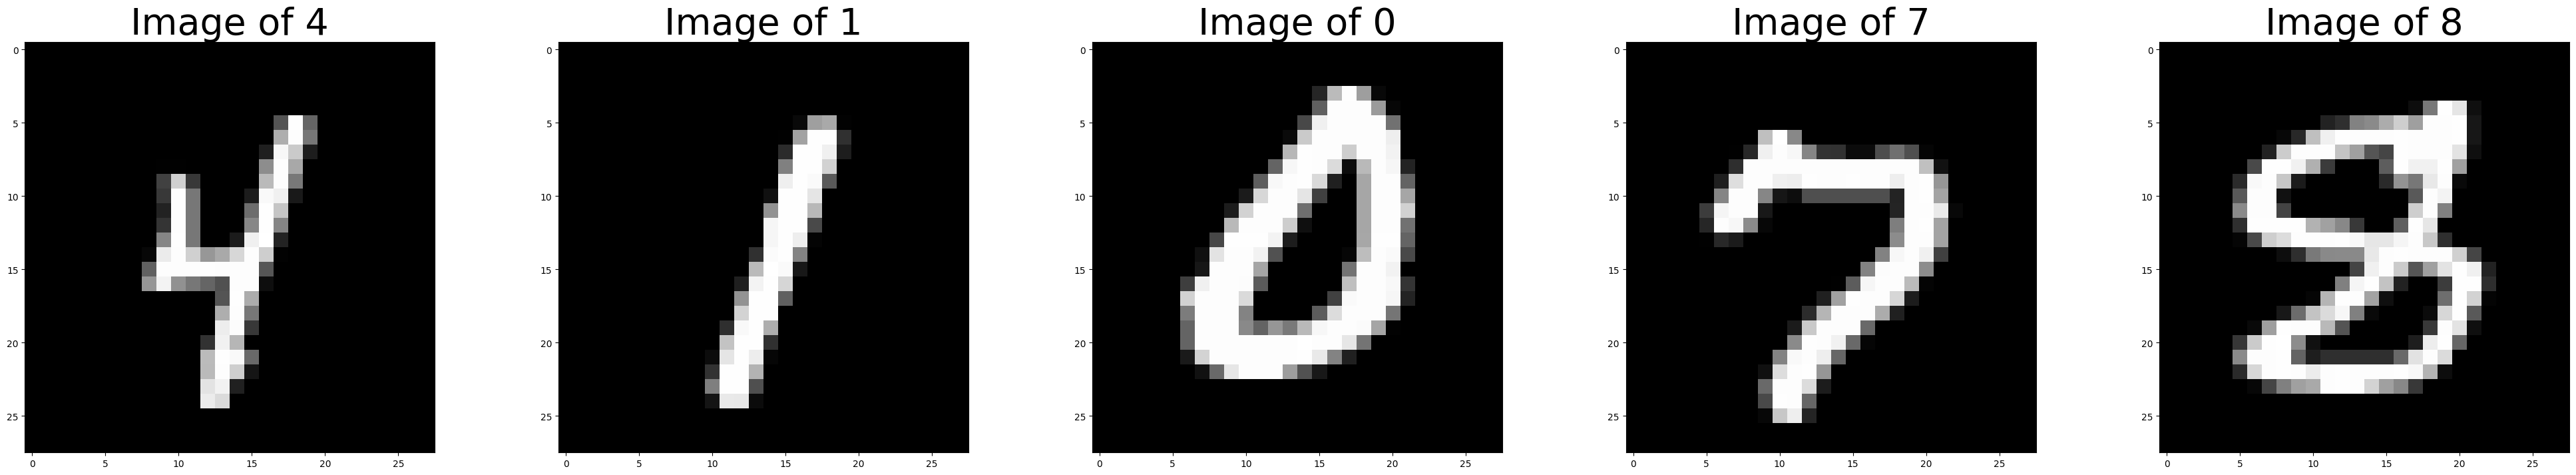

In [12]:
viz_mnist(mnist_x[:5], mnist_y[:5])

### Noise Step

Let us now demonstrate the noising process using Gaussian noise.

In [13]:
# Let's pick some images, like the first 5 again
sample_images = mnist_x[:5]

# Let's define some arbitrary noise schedule... say 0.003 --> 0.03 ... with 100 steps
sample_var_schedule = linear_var_schedule(0.003, 0.03, 100)
sample_alpha_ts_bar = calc_alpha_ts_bar(calc_alpha_ts(sample_var_schedule))

print("Sample timesteps", 100)
print("Sample var schedule has shape: ", sample_var_schedule.shape)
print("Sample alpha_ts_bar has shape: ", sample_alpha_ts_bar.shape)

Sample timesteps 100
Sample var schedule has shape:  (100,)
Sample alpha_ts_bar has shape:  (100,)


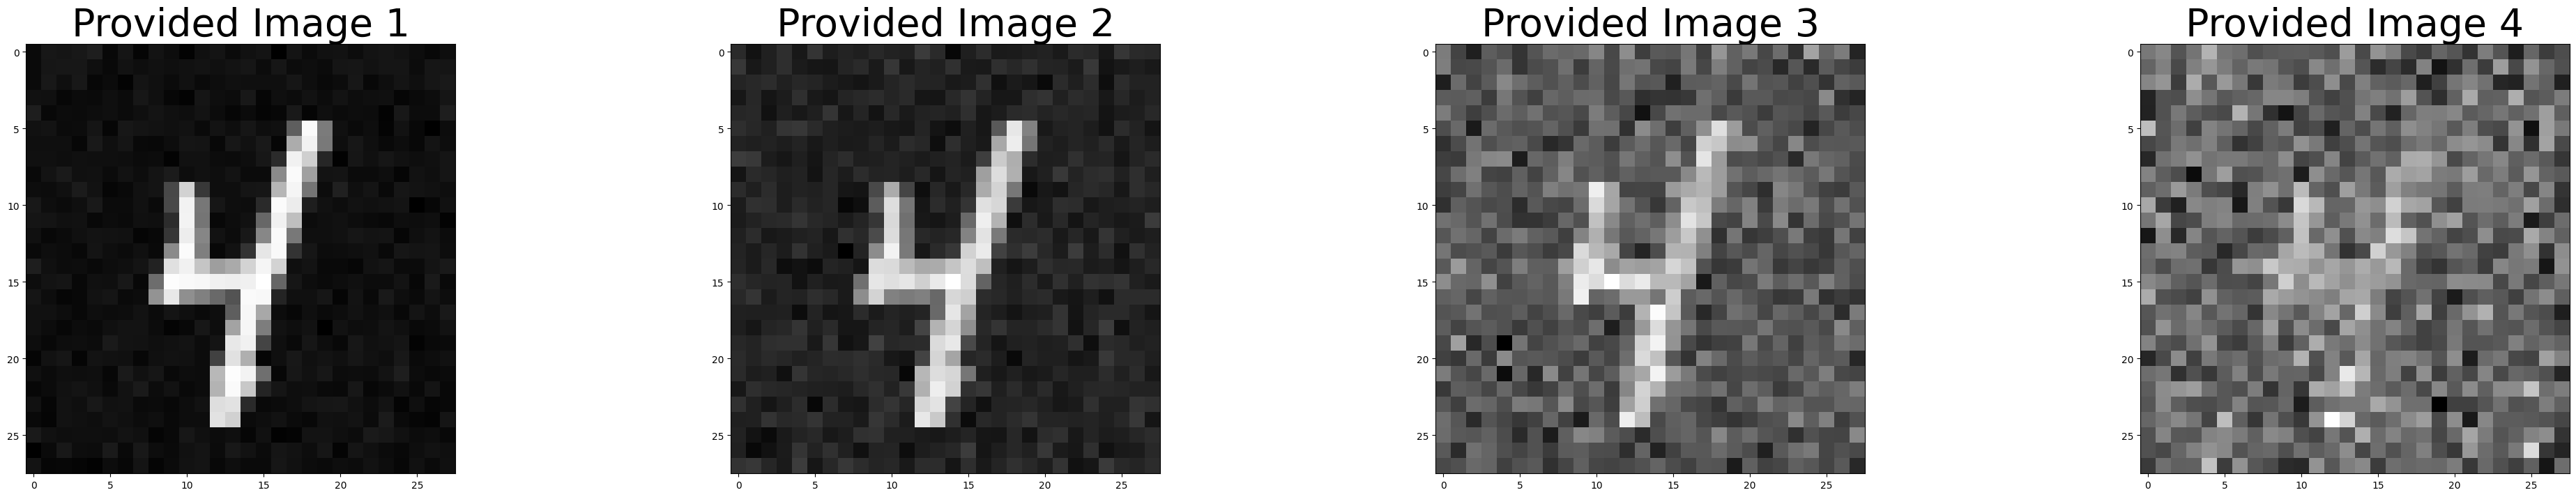

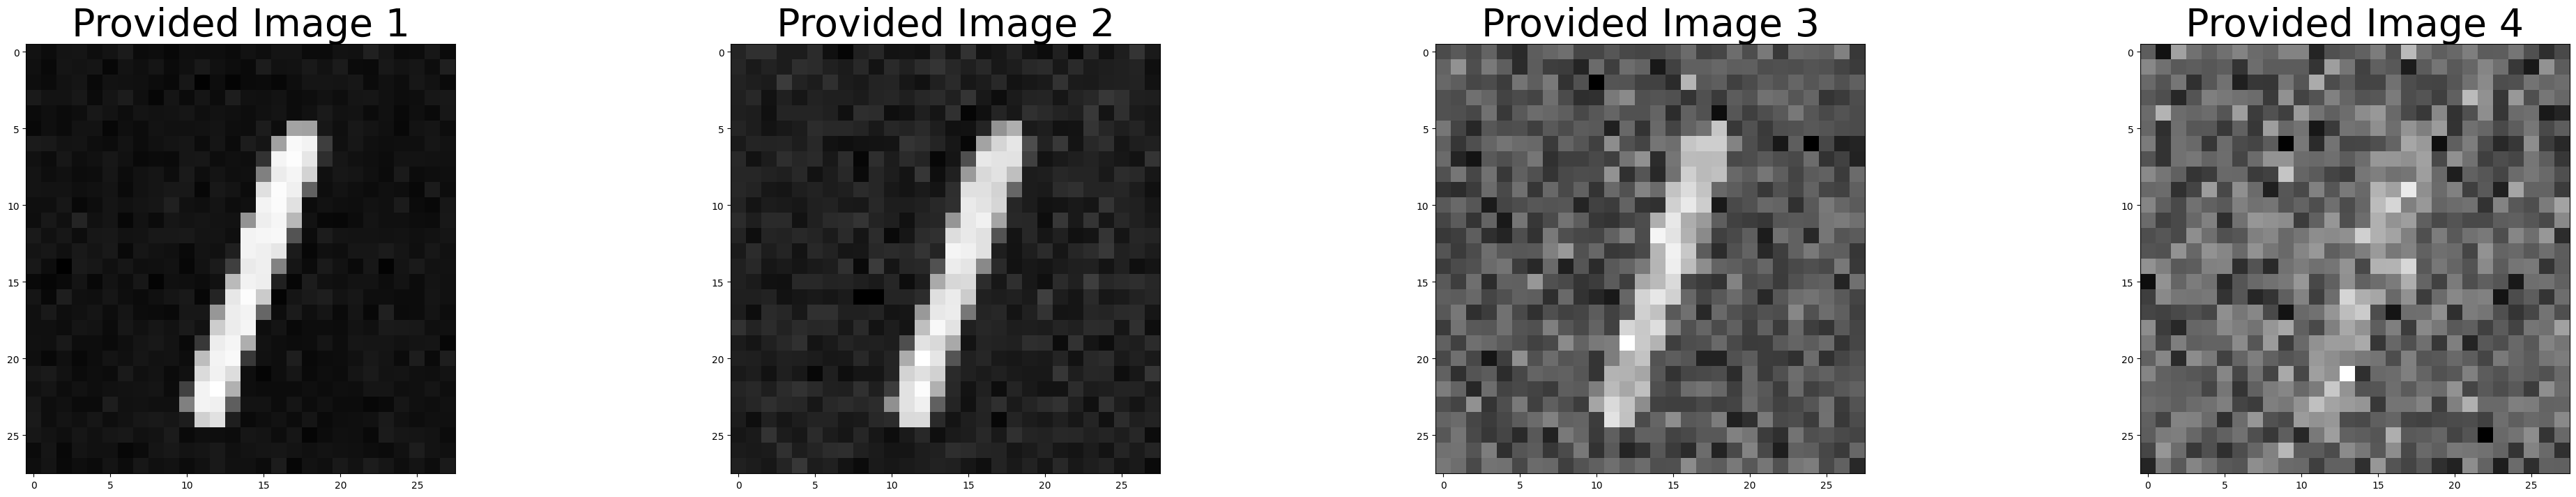

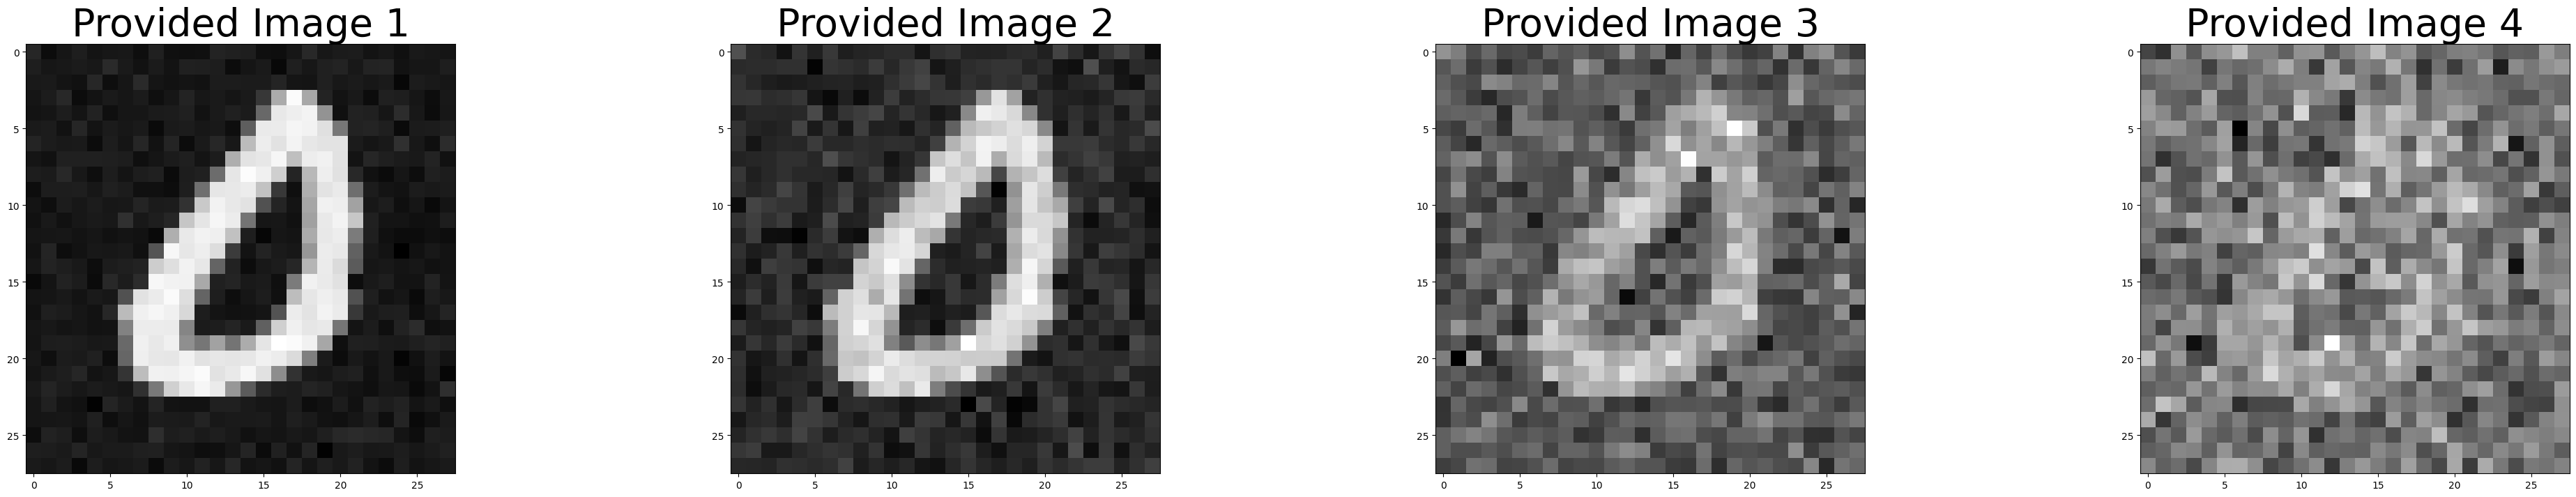

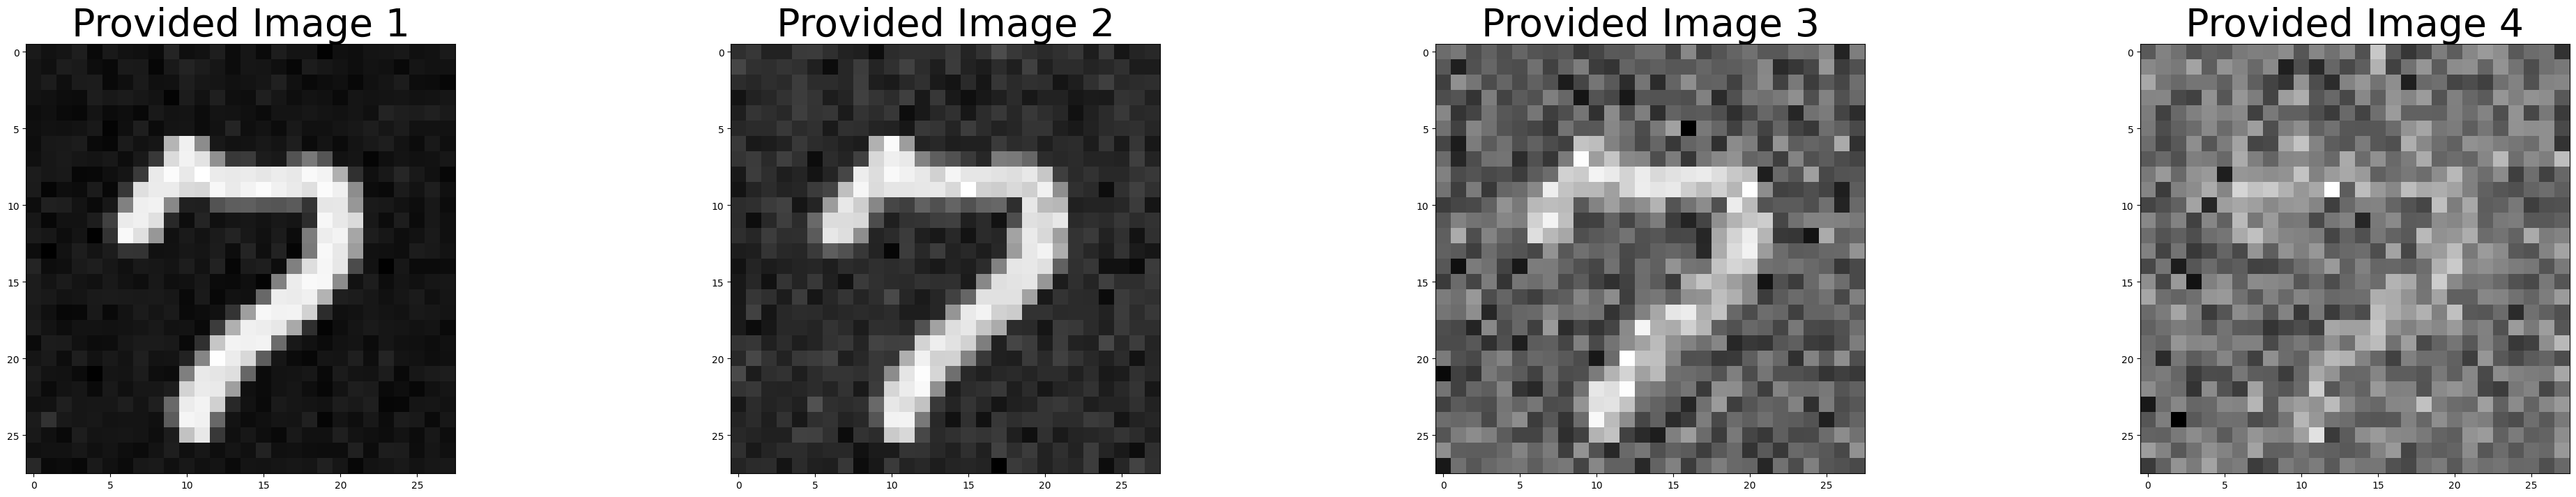

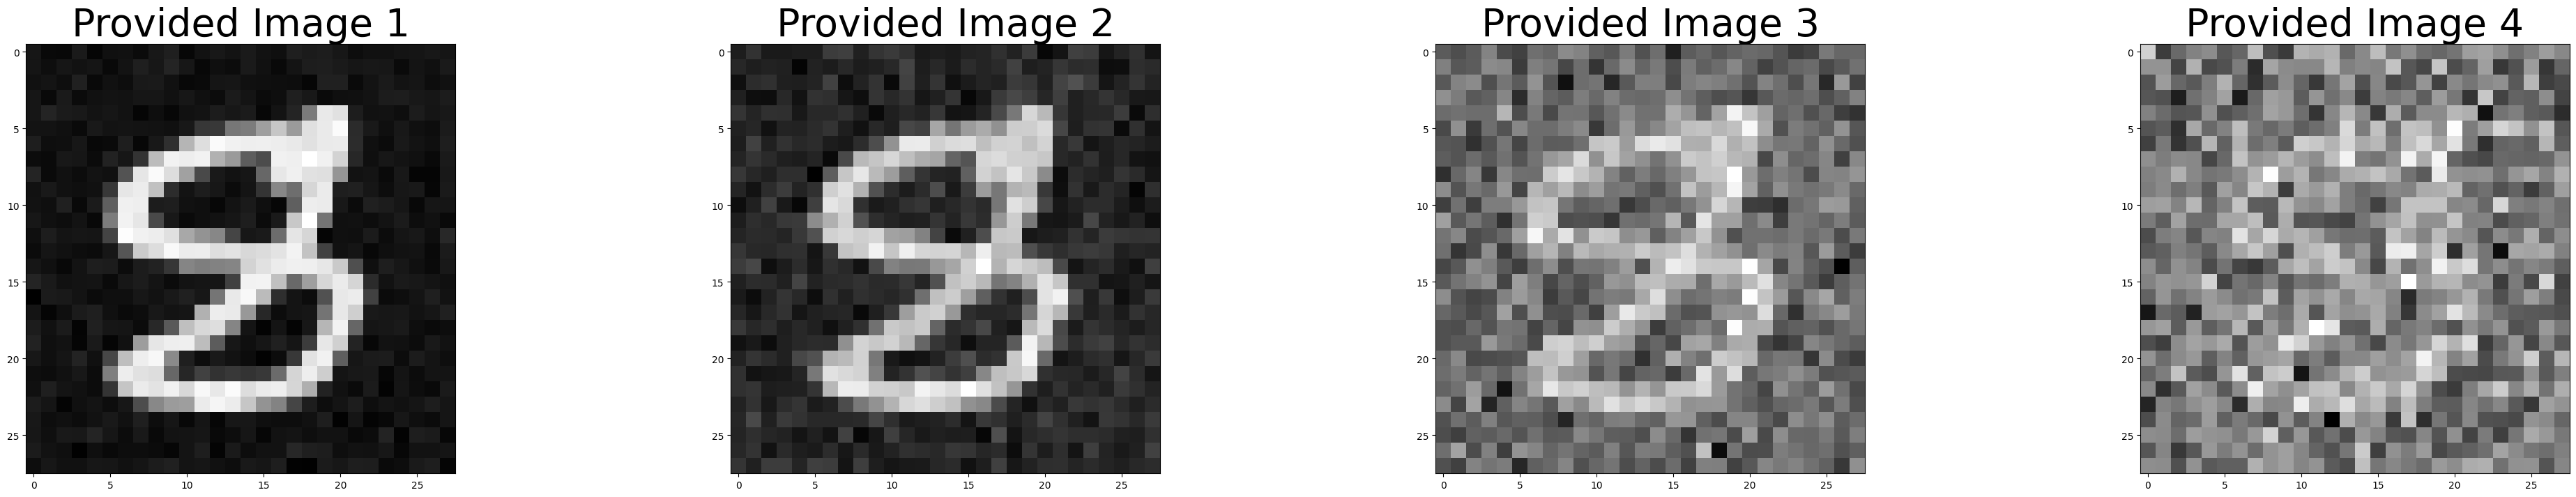

In [14]:
# Now for each image, I want to generate noise for step 2, 10, 50, 95... just some arbitrary
# values to demonstrate the functioning of the approach.

for img in sample_images:
    imgs_to_plot = np.zeros((4, 28, 28))
    for i, timestep in enumerate([2, 10, 50, 95]):
        nw_img, noise = gauss_noise_step(torch.tensor([img]), sample_alpha_ts_bar, timestep)
        imgs_to_plot[i] = nw_img.clone().numpy()

    viz_mnist(imgs_to_plot)

So the noise sampling works great. We can see how noise is applied quickly over many steps.

If the noise sampling is functional, we now need to train the reverse function.

### Training

Note one important thing to track is hyperparameters. Below we list all the necessary hyperparameters, and form combinations to search over in a grid search routine. 
Due to limited time and other models to run, the hyperparameter search is limited.

In [ ]:
# Hyperparameters to optimize over in grid search

## Cifar-10 

## Cifar-10 Classifier Free Guidance

## Galaxy Generation Classifier Free Guidance